<a href="https://colab.research.google.com/github/inmas-training/fa21-statistical-methods-workshop/blob/main/03a-linear-regression-with-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Within this notebook, we introduce linear regression and associated model inference techniques. Please note, this notebook emphasizes regression using `statsmodels` and `NumPy`.

## Diagnostics


In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

print(f"\nPython environment:\n{sys.version}")
print("\nStatistical packages loaded: ")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

print(f"\nRuntime location:")
try:
  from google.colab import drive
  is_google_colab = True
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


## Save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to your Google Drive! Please go to: 

```
File -> Save a Copy in Drive
```



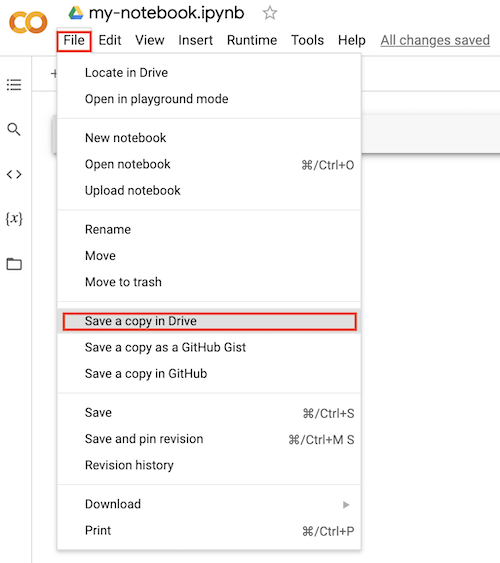

**If you _forget_ to save a copy of the notebook, all of your work will be lost when you close out of Google Colab.**

# Linear Regression



## Simple Linear Regression

Consider the simple linear relationship of a line:

$$Y = \beta_0 + \beta_1 X$$

The input is given as a paired coordinate of ($X$, $Y$), where $X = (X_1, X_2, \dots, X_n)$ is the input and $Y = (Y_1, Y_2, \dots, Y_n)$ is the output. Within the statistical framework, we call $\beta_0$ and $\beta_1$ **parameters**. With $\beta_1$ representing the slope of the line or the amount that we predict $Y$ to change for a 1-unit change in $X$ and $\beta_0$ representing the intercept or the average value when $X = 0$.

However, the equation of line assumes the data fits perfectly. In practice, this is not the case and is why we need statistics. As a result, we formulate the model by incorporating an error term: 

$$Y = \beta_0 + \beta_1\cdot X + \epsilon, \, \epsilon \sim N(0, \sigma_\epsilon)$$

This is a foundational example of the regression relationship:

$$Y = f(X) + \varepsilon$$

where where $f(X)$ is some function of $X$ and $\varepsilon$ refers to the error.

We're usually interested in estimating the parameters such that we get: 
$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1\cdot X$$

As such, we can estimate how error-prone our model is by comparing the truth with our estimate:

$$e = Y - \hat Y$$

Note, there is an important distinction between a realized error $e$ and a theorized error $\varepsilon$. 

Under our linear regresison model, we can: 

1. Predict $y$ when given new values of $x$
2. Explain variability in $y$
3. Describe relationships between $y$ and $x$.



In [ ]:
#@title  <-- Run! Demo of linear relationship (hidden)
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def highlight_linear_relationship(beta_0, beta_1):
  n = 50
  # Generate design matrix
  X = np.arange(-n, n, 1)*2/n
  Y_hat = beta_1 * X + beta_0
  # Graph the line of best fit
  plt.plot(X, Y_hat, color='blue', linewidth = 3, zorder = 3)
  # Plot details
  plt.xlabel(r'$x$')
  plt.ylabel(r'$y$')
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.ylim((-10, 10))
  plt.title(rf"where $\beta_0 = {beta_0:.02f}, \beta_1 = {beta_1:.02f}$ ")
  plt.suptitle(f'Linear Line: $Y = {beta_1:.02f}x + {beta_0:.02f}$')
  # Show graph
  plt.show()

a = interact(
      highlight_linear_relationship,
      beta_0 = widgets.FloatSlider(min=-10, max=10, step=0.25, value = 0),
      beta_1 = widgets.FloatSlider(min=-10, max=10, step=0.25, value = 1))


## Your Turn: Experiments with Slope

In the above widget, experiment with `beta_0` and `beta_1` slide.

Determine what values cause the linear line to be

1. Positive
2. Negative
3. Go directly through the origin (where the two black lines cross at 0,0)


---

answer 

--- 

## Simulating Linear Data

When trying to study various modeling techniques, the best approach is to create a data generation process that matches the assumptions of the model. In the case of linear regression data, generation process is governed by an $X$ value always increasing by 3. To make the problem interesting, we'll incorporate noise by randomly sampling from a Normal Distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$, e.g. $\varepsilon \sim N(0, 1)$. Under these conditions, we proceed by generating data for a simple linear regression.

In [ ]:
import numpy as np
import pandas as pd

# Set parameters
true_theta_0 = -1
true_theta_1 = 3
n = 50

# Set seed for reproducibility
np.random.seed(831)

# Generate design matrix
X = np.arange(0, n, 1)*2/n

# Create relationship
Y = true_theta_0 + true_theta_1*X 

# Add error
error = np.random.randn(n)
Y = Y + error

In [ ]:
#@title  <-- Run!  Dynamic data display chunk (hidden)
from IPython.display import display, Markdown
# Display guesses in a nicely formatted manner
display(Markdown(
rf"""

$Y$ values were generated under the relationship : 

$$Y = {true_theta_0} + {true_theta_1} X + \varepsilon$$
"""
))

# Display first 10 rows from DataFrame output in a formatted table
display(pd.DataFrame({"x": X, "y": Y}).head(10))

Data relationships can be expressed graphically by plotting the points under a scatterplot.

In [ ]:
import matplotlib.pyplot as plt

# Construct a scatter plot showing the relationship between
# X & Y variables 
plt.scatter(X, Y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title("Linear Data with Slight Scattering")
plt.show() 

## Your Turn: Generating Polynomial Data 

Simulate data and graph data under the polynomial expressions:

- Y_order_2 = $\beta_0 + X_1\beta_1 + X_1^2\beta_2 + \varepsilon$  
- Y_order_3 = $\beta_0 + X_1\beta_1 + X_1^2\beta_2 + X_1^3\beta_3 + \varepsilon$ 

Please try out different values for $\beta_1$, $\beta_2$, and $\beta_3$.

Notice, we applying a power transformation under a single feature, $X_1$, not the parameter. 



In [ ]:
## Code here

## Estimating with the Normal Equations

In this section, we're going to explore how linear regression is applied to the set of generated data.

### Linear Regression Formulation
Linear regression is expressed usually under:

$$
\begin{align}
y_i &= X_{i,0}\beta_0 + X_{i,1}\beta_1 + \cdots + X_{1,p-1}\beta_{p-1} \\
&= \sum_{j=0}^{p - 1 }X_{i,j}\beta_j \\
\mathbf{y}_{n \times 1} &= \mathbf{X}_{n \times p}\mathbf{\beta}_{p \times 1}
\end{align}
$$

where $\mathbf{X}$ is a design matrix/input, $\mathbf{\beta}$ contains the parameters, and $\mathbf{y}$ is a response vector. The insides of the matrices look like:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{1, 1} & x_{1, 2} & \cdots & x_{1, p-1} \\
1 & x_{2, 1} & x_{2, 2} & \cdots & x_{2, p-1} \\
\ldots & & \ddots & & \\
1 & x_{n, 1} & x_{n, 2} & \cdots & x_{n, p-1} \\
\end{bmatrix}_{n \times p}, \mathbf{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\ldots \\
\beta_{p-1} \\
\end{bmatrix}_{p \times 1}, \mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\ldots \\
y_n \\
\end{bmatrix}_{n \times 1}$$






### Solutions for Linear Regression

The primary approach for estimating regression coefficients was done by using the **normal equations**. Normal Equations provide a **closed-form** solution to estimating regression coefficients by setting equal to zero the partial derivatives of the sum of squared residuals/errors (SSE). In short, the normal equations are given as:

$$\hat \beta_{p \times 1} = (X^{\top}X)_{p \times p}^{-1}X^{\top}_{p \times n}y_{n \times 1}$$



We can quickly estimate the beta, $\beta$, parameters under this scheme.

In [ ]:
import numpy as np

# Incorporate the column of 1's into the design matrix
X_intercept = np.concatenate([np.ones((n, 1)), X[:,np.newaxis]], axis=1)

beta_hat = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
beta_hat

### Minimization of the Sum of Squares

When viewing a minimization problem, we're seeking to find the function's **smallest** value. But, what does that mean exactly in the context of regression? Well, given a line and scattered points, the smallest distance to each point from the line is desired. 

That is, we want the defined sum of squares value $D = \frac{1}{n}\sum_{i = 1}^{n} e_i^2$ to be as close to zero as possible. Note, $D$ is a single real-valued number like 1.2132. 

The bottom line: the closer to zero, the better.




Normal equations provide a highly desirable **closed-form solution** to estimating regression coefficients. The equations were derived analytically by **minimizing** SSE through derivatives. Effectively, the minimization equation is written as:

$$
\begin{align}
\hat{\mathbf{\beta}}_{p \times 1} &= \underset{\beta}{\operatorname{argmin}}\; \sum_{i=1}^{n} e_i^2  \\
&= \underset{\beta}{\operatorname{argmin}}\; \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2  \\
&= \underset{\beta}{\operatorname{argmin}}\; \sum_{i=1}^{n} \left( y_i - \sum_{j=0}^{p-1}X_{i,j}\beta_j \right)^2  \\
\end{align}
$$

Under matrix-form, the sum of residuals squares can be written succiently as:

$$
\begin{align}
\hat{\mathbf{\beta}}_{p \times 1} &= \underset{\beta}{\operatorname{argmin}}\; (\mathbf{y} - \mathbf{X}\mathbf{\beta})^{\top}(\mathbf{y} - \mathbf{X}\mathbf{\beta}) \\
&= \underset{\beta}{\operatorname{argmin}}\; \lVert \mathbf{y} - \mathbf{X}\mathbf{\beta} \lVert^2
\end{align}
$$



The closed form for simple linear regression can be derived to:

$$\begin{align}
\hat{\beta}_1 &= \frac{\sum_{i=1}^{n}{(x_i - \bar x)(y_i - \bar y)}}{\sum_{i=1}^{n}{(x_i - \bar x)^2}} \\ 
&= \frac{S_{xy}}{S_{xx}} \\
&= r_{xy}\frac{S_{y}}{S_{x}} \\
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1\bar{x} \\
\end{align}$$

where $r_{xy}$ refers to a correlation coefficient given by: 

$$r_{xy} =\frac{\sum\limits_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}
            {\sqrt{\sum\limits_{i=1}^n (x_i-\bar{x})^2 \sum\limits_{i=1}^n (y_i-\bar{y})^2}}$$

further, we have $S_{x}$ and $S_{y}$ are the **uncorrected** sample standard deviations:

$$S_{x} = \sqrt{\frac{1}{N} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2}$$


### Aside: Correlation



We can explore how our data is related using the idea of spearman correlation coefficient, $r$. The goal of $r$ is to provide a statistical measurement that describes the relationship between between two variables. For instance, we might want to understand the correlation between the price of a car and the amount of gasoline it requires per mile. 

The correlation values  ranges between $-1.0 \le r \le 1.0$. If a correlation coefficient is above -1 or 1, there likely is an error in the function. Any correlation coefficient equal to $r = -1.0$ shows a perfectly negative correlation. Similarly if we have a correlation coefficient equal to $r = 1.0$, we would have a perfect positive correlation. On the other side, if we have a correlation coefficient $r = 0.0$, we could conclude that there is no linear relationship between the two variables.


In [ ]:
#@title Graph Positive Correlation (Hidden)
# Positive correlation
x = np.arange(start=0, stop=25, step=1)
plt.plot(x, 'o')
plt.title(r"Positive correlation, $r = 1$")
plt.show()

In [ ]:
#@title Graph Negative Correlation (Hidden)
x = np.arange(start=25, stop=0, step=-1)
plt.plot(x, 'o')
plt.title(r"Negative correlation, $r = -1$")
plt.show()

In [ ]:
#@title Graph No Correlation (hidden)
x = np.random.rand(25)
plt.plot(x, 'o')
plt.title(r"No Correlation, $r = 0$")
plt.show()

We can see an array of correlation coefficient values and there associated patterns: 

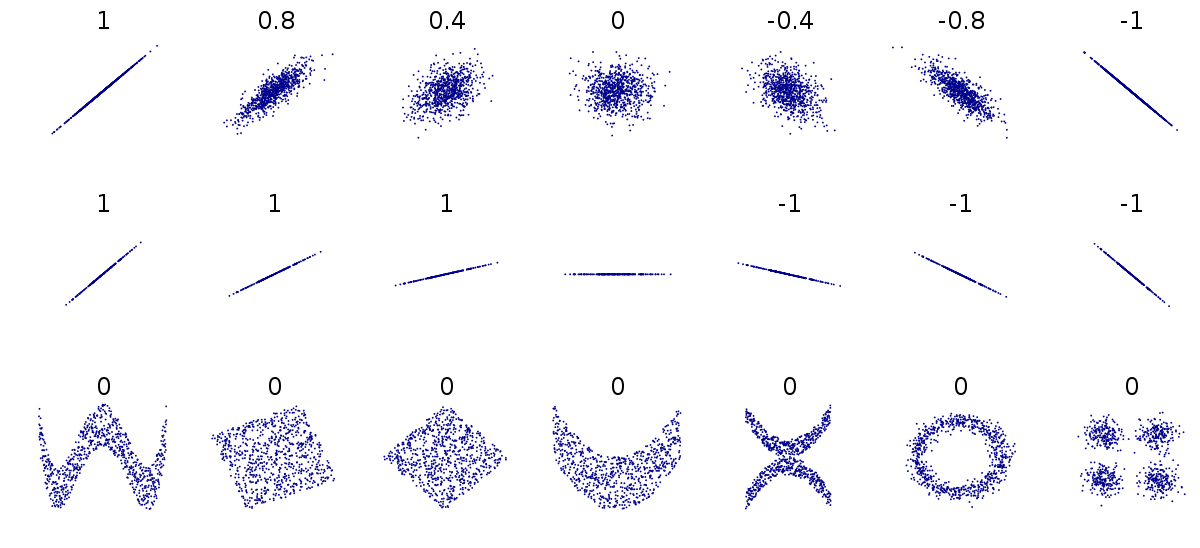

We can compute the correlation using the `spearmanr` function from `scipy.stats`.

In [ ]:
from scipy.stats import spearmanr
import numpy as np 

# calculate spearman's correlation
corr, _ = spearmanr(X, Y)
print(f'Spearmans correlation: {corr:.3f}')

## Your Turn: Simulate Data



Please simulate two different sets of data containing 100 observations from a Normal distribution: 

$$
\begin{align}
V_1 &\sim \mathcal{N}(\mu_1 = 100, \sigma_1 = 20) \\
V_2 &\sim \mathcal{N}(\mu_2 = 50, \sigma_2 = 10) \\
\end{align}
$$

Recall that random number can be drawn from a normal distribution using:

```python
import numpy as np 
M = sigma * np.random.randn(n) + mu
```


In [ ]:
## code here

With the data simulated, let's create a correlation by adding the first data set onto the second:

$$
O = V_1 + V_2
$$

From there, calculate the spearman correlation coefficient between $V_1$ and $O$.

In [ ]:
## code here

### Interpreting Normal Equations for Simple Linear Regression

Notice that the intercept of the model is given as: 

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

As a result, we note that the model must go through $(\bar x,\bar y )$ or the sample means.

Moreover, from our introductory discussion, we mentioned that the slope of the regression line describes the average change in the predicted response when our explanatory variable changes by 1 unit. However, we can also observe how the slope relates to the level of correlation: 

$$\hat{\beta}_1 = r_{xy}\frac{S_{y}}{S_{x}}$$

The inclusion of the correlation into slope indicates that when $x$ increases by a standard deviation, we see the average change in the predicted response to be a fractional change of $r$ standard deviations in $y$.



### Solving by Random Guessing

Having seen the possible parameter values and the related effect on cost, the question becomes: "How can we find parameter values that minimize the cost function?"

For a problem like this, perhaps the best way to start is to use the tried and true method of: guessing and checking. After each guess, refine the next guess based on whether the response is close or far away to the target.

Try out guessing a few values down below! For each guess, make sure to observe how the regression line changes.

In [ ]:
#@title <-- Run! Compute and Display Line of Best Fit (Hidden)
import numpy as np
import matplotlib.pyplot as plt

def manual_min_rss(X, Y, guess_theta_0, guess_theta_1):
  # Compute predictions under guessed parameters
  Y_hat = guess_theta_0 + np.dot(guess_theta_1, X)

  # Compute cost
  cost = np.mean((Y_hat - Y)**2)

  # Add data points
  plt.scatter(X, Y, color = 'black', zorder = 2) 
  # Add the estimated line of best fit
  plt.plot([X[0], X[-1]], [Y_hat[0], Y_hat[-1]], color = 'blue', zorder = 3)  
  # Plot the residual line
  plt.vlines(X, Y, Y_hat, color="red", zorder = 1)
  # Provide graph labels
  plt.xlabel(r'$x$')
  plt.ylabel(r'$y$')
  plt.title(rf"Guessed values for $\theta_0 = {guess_theta_0:.04f}, \theta_1 = {guess_theta_1:.04f}$ ")
  plt.suptitle("Manual Solution Search for Linear Regression")
  # Release graph
  plt.show()

In [ ]:
#@title  <-- Run! Interactively fit a line.
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Markdown

def manual_guessing(guess_theta_0, guess_theta_1):
  # Display guesses in a nicely formatted manner
  display(Markdown(
  rf"""
Randomly pick values for """r"""$\boldsymbol{\theta}$""" 
  rf"""
  and, then, run the code cell to see how well they did!
  
  - $\theta_0$ = {guess_theta_0}
  - $\theta_1$ = {guess_theta_1}
"""
  ))

  manual_min_rss(X = X, Y = Y, 
               guess_theta_0 = guess_theta_0, 
               guess_theta_1 = guess_theta_1)
  
  return 1


b = interact(manual_guessing,
         guess_theta_0 = widgets.FloatSlider(min=-10, max=10, step=0.25, value = 0),
         guess_theta_1 = widgets.FloatSlider(min=-10, max=10, step=0.25, value = 1))


# Linear Regression in Python 

Many existing libraries have implementations that will quickly estimate the parameters of a linear regression. In the case of `Python`, we'll primarily use `statsmodels`. In a separate notebook, we include `NumPy` implementations for our own simple linear regression variant using the closed-form solutions and numerical optimization.


## statsmodels: statsmodels.api.OLS

`statsmodels` provides a statistical toolkit with an emphasis on diagnostic and inference capabilities. When working on statistical-oriented projects, make sure to use `statsmodels` instead of `scikit-learn`. Though, the latter will be a bit more useful for model selection.


## Modeling Approaches

There are two modeling interfaces for `statmodels`: 

1. The direct approach that assumes you have pre-specified the design matrix $X$ and have separated out $Y$, or
2. The *R* like approach using model formulas that automatically constructs the design matrix and response vector.

### Direct Approach

Under the direct approach, we need to ensure that we append an intercept or a column of ones to the design matrix. 


In [ ]:
# Load modules and data
import numpy as np
import statsmodels.api as sm

# If an intercept isn't provided in the design matrix, make sure to add it!
X_with_intercept = sm.add_constant(X)

From there, we can specify the model using:

In [ ]:
# Specify the model
model = sm.OLS(Y, X_with_intercept)

Then, we can fit the model to the data.

In [ ]:
# Obtain a summary report
results = model.fit()

print(results)

Note, that the results object is just a pointer that can be individually accessed.

### Formula-approach

On the other hand, the formula approach relates closely to how we specify the linear model. Generally, we prefer using the formulas compared to manually crafting design matrices. 

The syntax is given as:

```python
smf.ols('y ~ x ', data = my_data)
```

where `my_data` is a pandas data frame with columns named `x` and `y`.

We can quickly take our generated data and convert it. 

In [ ]:
# Convert from NumPy matrix into pandas data frame
slr_df = pd.DataFrame({'x': X, 'y': Y.ravel()})

With the data now converted into a `Pandas` data frame, we can now model:

In [ ]:
# Specify the model 
model_formulation = smf.ols('y ~ x', data = slr_df)

# Fit the model
results = model_formulation.fit()

# View parameters
results.params

### Aside: Obtaining Values

We can extract desired values by looking at the `results` object.

In [ ]:
results.params # Estimated parameters

In [ ]:
results.aic    # Model selection

In [ ]:
results.fvalue # F-statistic

Additional possibilities can be listed out by using:

In [ ]:
dir(results)[0:10]


In particular, note that it contains: 

- Coefficient of Determination: R^2/Adj R^2
- Model selection criteria: AIC, BIC
- Null vs. Fit model under ANOVA: F-statistic

## Model Summary Overview

To view the overarching characteristics of the model, we would need to call `.summary()`.

In [ ]:
model_summary = results.summary()
print(model_summary)

## Inference

### Hypothesis Testing 

We can assess whether the predictor should be included or excluded from the model by checking to see if it is significant. In particular, we establish a relationship between a known distribution and assess how much the observation deviates. For regression, the hypotheses are:

$$
\begin{align*}
H_0: \beta_1 = 0 \\
H_A: \beta_1 \neq 0
\end{align*}
$$

where $H_0$ refers to the null hypothesis (or assumed truth) and $H_A$ refers to the alternative hypothesis. 

We can generate a test statistic then of: $$t = \frac{\hat{\beta_1}}{SE_{\hat{\beta_1}}}$$

This statistic is approximately distributed to $t$-distribution with $df=n-k-1$ degrees of freedom. We can use this statistic to generate a $p$-value. Using this $p$-value, we can compare it to a significance level of $\alpha = 0.05$. If the value is below that, we reject the null hypothesis ($H_0$). This means that there is evidence to suggest that the parameter is _not_ equivalent to zero. 
 

From the `results.summary()`, we can see that all $p$-values associated with model parameters ($\beta_0$ and $\beta_1$) are well below the $\alpha = 0.05$ level. Thus, both of these parameters contribute significantly to the model. If we removed them, the explanatory power of the model would be harmed. 

### Confidence Interval

Another approach to inference on the model is to construct a confidence interval. Confidence intervals provide an estimated range of values that are likely to include an unknown population parameter. We usually like to be about 95% confident that the interval will contain the observation. However, the interval is specified in terms of _long-run_ expected frequency. 

That is to say, if we use a 95% confidence interval, we would assume that the true parameter is captured 95 times out of every 100 experiments.

$$
\begin{align*}
&\hat{\beta}_1 \pm t^* \cdot SE_{\hat{\beta}_1}\\ 
&[\hat{\beta}_1 - t^* \cdot SE_{\hat{\beta}_1} , \hat{\beta}_1 + t^* \cdot SE_{\hat{\beta}_1}]
\end{align*}
$$

We interpret a confidence interval as: 

> "We are 95% confident that for a 1-unit increase in $x$, we would see an [increase/decrease] in the response of between [bottom] and [top] units."




## Model Fit

We can assess fit by partitioning the variability in our response variable as:

$$SST =SSM+SSE$$

Here we are relating the total sum of squares (SST), model sum of squares (SSM), and the residual sum of squares (SSE). Each of these terms breakdown to:

\begin{eqnarray*}
SST &=& \sum_{i=1}^n (y_i-\bar{y})^2 \\
SSM &=& \sum_{i=1}^n (\bar{y} - \hat{y})^2 \\
SSE &=& \sum_{i=1}^n (y_i -\hat{y})^2
\end{eqnarray*}


### Coefficient of Determination 
We can use the coefficient of determination or $R^2$ to assess the model.
The larger the  
  value, the more variability we can explain using the model.

$$R^2 = 1 - \frac{SSE}{SST} = \frac{SSM}{SST}$$

For example, let's assume we have an $R^2 = 0.75$.

It can be referred that 75% of the variation of the output can be explained by the model while the remaining 25% of the variability is still unaccounted for.


### Adjusted R-squared

Unfortunately, if we were trying to compared how well the model performs with another model, we would not be able to use $R^2$ by itself. The reason for this comes from how fitted sum of squares or $SSM$ will always increase for each new parameter added. As a result, we need to derive a new metric for comparing across models. In this case, we propose the adjusted $R^2$ value given by:

$$R^2_{adj} = 1- \frac{SSE/(n-1)}{SST/(n-k-1)}$$

where $n$ is the number of observations, $k$ is the number of predictors excluding the intercept, and the $-1$ accounts for the intercept.

## Predictions

With the model, the response values available in $y$ may now be predicted using the parameter estimates of our model under:

$$\hat y = X \hat \beta$$ 

In [ ]:
# Retrieve beta estimates from statsmodels
beta_hat = results.params

# Compute estimates
Y_hat = np.dot(X_with_intercept, beta_hat)

print(f"Number of Predictions: {Y_hat.shape}")

In low-dimensional cases, we can observe how well the relationship is captured by graphing the line of best fit alongside of the actual data. 

In [ ]:
# Show data points
plt.scatter(X, Y,  color='black', zorder = 2)

# Graph the line of best fit
plt.plot(X, Y_hat, color='blue', linewidth = 3, zorder = 3)

# Plot details
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(rf"Estimated values for $\beta_0 = {beta_hat[0]:.04f}, \beta_1 = {beta_hat[1]:.04f}$ ")
plt.suptitle('Linear Regression under Normal Equation')
plt.show()

## Residual 



The "residuals" of the fit are the difference between the model's prediction $\hat y = X \hat \beta$ and the original $y$ values:

$$r = y - \hat y = y - X \hat \beta$$

We can modify the prediction graph slightly to show the residual fit given by the "red" lines. 

In [ ]:
# Show data points
plt.scatter(X, Y,  color='black', zorder = 2)

# Graph the line of best fit
plt.plot(X, Y_hat, color='blue', linewidth = 3, zorder = 3)

# Show residual lines
plt.vlines(X, Y, Y_hat, color="red", zorder = 1)

# Plot details
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(rf"Estimated values for $\beta_0 = {beta_hat[0]:.04f}, \beta_1 = {beta_hat[1]:.04f}$ ")
plt.suptitle('Linear Regression under Normal Equation')
plt.show()

The residuals can be obtained from the `results` object under:

In [ ]:
residuals = results.resid

Alternatively, we could compare the predicted values with the fit values ourselves:

In [ ]:
residuals = Y - Y_hat

With the residuals in hand, we do want to check to see if the residuals vs. fitted plot exhibits **Homoscedasticity** behavior (same error is consistent). If the graph displays **Heteroscedasticity** behavior, we would need to re-evaluate this model.

In [ ]:
plt.scatter(X_with_intercept[:, 1], residuals)
plt.xlabel(r'$x$')
plt.ylabel('Residuals')
plt.title("Comparing residuals against covariate")
plt.show()

When looking at the graph, we are seeking to see if the data points are equally scattered (homoscedasticity). If the points are **not** equally scatter, then we would have a case of **heteroscedasticity**.

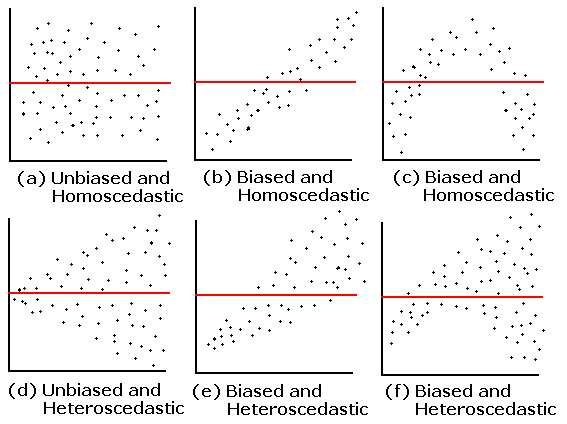

### Verify Assumptions

In order for a linear regression model to be appropriate, a number of conditions must be met.

- **L**inearity
- **I**ndependence
- **N**ormality
- **E**quality of variance

These conditions are mainly related to the distribution of the residuals.

Assumption |	Consequence |	Diagnostic	| Solution
----| ---| --|--
Independence | Inaccurate inference | Common sense/context | Use a different technique/ don’t model  
$\mathbb{E}[\varepsilon] = 0$ | Lack of model fit | Plot of residuals vs. Fitted values | Transform either input $x$and/or $y$
$\operatorname{Var}(\varepsilon)=\sigma^2$ | Inaccurate inference | Plot of residuals v. fitted values | Transform  $y$ 
$\varepsilon \sim N(\mu, \sigma)$  | If extreme, inaccurate inference | QQ plot | Transform  $y$ |

### Expectation of residuals

One assumption of the linear model is the expectation or the average value across residuals is 0. We can verify that by taking the mean:

In [ ]:
results.resid.mean()

Notice, this number is very small on the order of `E-17` that results from working with a decimal number. 

### Assessing Normality of Residuals

We can employ visual methods for assessing the quality of the residuals through either graphing them with a histogram or a **Q–Q** (quantile-quantile) plot.  The **Q-Q plot** focuses on comparing two distributions to each other to see if they come from populations with a common distribution. We add a 45-degree reference line that helps us visually assess this information. In particular, if points fall on this line, they should come from the same distribution. If they are significantly far away, then the underlying distributions are different. 

In [ ]:
import scipy.stats as stats
import seaborn as sns

residuals = Y - Y_hat

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
_ = stats.probplot(residuals.ravel(), plot=ax2)

Alternatively, we can apply a hypothesis test designed to assess normality called the D'Agostino's K-squared test. 

In [ ]:
import scipy.stats as stats

residuals = Y - Y_hat

stats.normaltest(residuals)

# Real world: Salaries

## Importing Data

Let's take a look at the Salaries data set.

<https://raw.githubusercontent.com/inmas-training/fa21-statistical-methods-workshop/main/data/Salaries.csv>

The data set contains 397 observations on the following 6 variables.

- rank: a factor 
  - AssocProf, AsstProf, Prof
- discipline: a factor
  - A (“theoretical” departments) or B (“applied” departments).
- yrs.since.phd: integer
  - years since PhD.
- yrs.service: integer
  - years of service.
- sex: a factor
  - Female Male
- salary: number
  - nine-month salary, in dollars.

We can import the `Salaries` data set into Python using:

In [ ]:
import pandas as pd 

url = "https://raw.githubusercontent.com/inmas-training/fa21-statistical-methods-workshop/main/data/Salaries.csv"
Salaries = pd.read_csv(url)

display(Salaries)

Let's look at how each variable interacts with another to see if there are any notable signs of **colinearity**. 

In [ ]:
import seaborn as sns

sns.pairplot(Salaries);

Looking at the pair-wise plot, we can see there appears to be "colinearity" between `yrs.service` and `yrs.since.phd`. This is to be expected as professors usually only become professors after completing a PhD.

## Correlation Matrix

An alternative to the pair-wise plot is to use a **correlation matrix**. This correlation matrix stores the values of strength between variables. 

In [ ]:
round(Salaries.corr(), 2)

In the case of Salaries, we have a slightly high correlation of `0.91` between `yrs.since.phd` and `yrs.service`. So, we have further confirmed our initial visual findings.

## Fitting a model

Note, when we imported `Salaries`, the variable names contained a period.

In [ ]:
Salaries.columns

Because some of the variable names contain a period, we need to quote any variable using a period with `Q(" ")` inside of our regression formula ([This is due to a parsing issue](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.Q)). In this case, we can fit a model between `Salary` and `yrs.since.phd`.

In [ ]:
results = smf.ols('salary ~ Q("yrs.since.phd")', data = Salaries).fit()
results.params

We can extract out the model parameter estimated and incorporate them as a description within our own model. Using our mathematical notation for linear regression, we have:

$$\hat{\text{salary}} = 91,718.7 + 985.3 \cdot \text{yrs.since.phd}$$

where $\beta_0 = 91,718.7$ and $\beta_1 = 985.3$.


## Your Turn: Interpreting Output 

What would this model predict for the salary of a professor who had just finished their PhD?


In [ ]:
## code here


What does the model predict for a professor who has had their PhD for 51 years?



---

answer

---

## Multiple Variables

Once we use more than one variable within the regression, we move from doing "simple" linear regression to "multiple" linear regressions. We will still use one quantitative response variable $Y$, but now we will incorporate more than one explanatory variable, e.g. $x_{1}, x_{2}$ where $j$ refers to the variable. 


$$Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \cdots + \beta_p \cdot X_p + \epsilon, \text{ where } \epsilon \sim N(0, \sigma_\epsilon)$$


For instance, if we wanted to model `salary` based on `yrs.since.phd` and `yrs.service`, we would use:

In [ ]:
results = smf.ols('salary ~ Q("yrs.since.phd") + Q("yrs.service")', data = Salaries).fit()
results.params

### Exploiting Categorical Variables

Within the `Salaries` data set, we have a few categorical variables such as: `rank`, `discipline`, and `sex`. These variables can be identifed using `.info()` 



In [ ]:
Salaries.info()

Let's refit a model to the `Salaries` data set that takes into account the `rank` of the professor. Before we begin, let's look at the levels available within this variable:

In [ ]:
Salaries['rank'].value_counts()

When we go to fit a new **multiple** linear regression, we just add the variable after the first variable using `+`. For example:

In [ ]:
results = smf.ols('salary ~ Q("yrs.since.phd") + rank', data = Salaries).fit()
results.params

However, when we look at the coefficients estimated, we notice that one rank is missing. Or is it? 

In reality, the `Assoc` professor is included in the `intercept` as part of a **baseline** comparison. As a result, we're left with two "dummy" variables that cover the space.

$$\text{rankAsstProf} = \left\{ \begin{array}{ll}
1 \text{ if AsstProf} \\
0 \text{ otherwise}
\end{array}
\right. \text{ and  } 
\text{rankProf} = \left\{ \begin{array}{ll}
1 \text{ if Prof} \\
0 \text{ otherwise}
\end{array}
\right.$$

### Aside: Pandas Dummy Variables 

We can automatically generate dummy variables using `pandas`:

In [ ]:
rank_levels = pd.get_dummies(Salaries['rank'])
rank_levels.head(5)

\begin{eqnarray*}
\begin{pmatrix}
Prof \\
Prof\\
AsstProf\\
Prof\\
Prof\\
AssocProf
\end{pmatrix} \rightarrow 
AsstProf = \begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
0 \\
0
\end{pmatrix},
AssocProf =  \begin{pmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
1
\end{pmatrix},
Prof = 
 \begin{pmatrix}
1 \\
1 \\
0 \\
1 \\
1 \\
0
\end{pmatrix}
\end{eqnarray*}


If we wanted to change the _base-line_, then we would need to modify the design matrix:

In [ ]:
rank_levels.drop(columns='AsstProf', inplace=True)
rank_levels.head(3)

Now, the `AsstProf` is the **baseline** value that `AssocProf` and `Prof` are compared to.

## Kitchen Sink Model 


In a "kitchen sink" model, we seek to fit all parameters inside of the data frame.

In [ ]:
results = smf.ols('salary ~ Q("yrs.since.phd") + Q("yrs.service") + rank + sex + discipline', data = Salaries).fit()

kitchen_sink_model = results.summary()

print(kitchen_sink_model)

## Your Turn: Fitting a New Model

In the prior model, we focused on comparing `Salary` against `yrs.since.phd`. In the next model, please compare `Salary` against `yrs.service`.

In [ ]:
## code here

What was the observed salary value for the person with 51 years of experience?



In [ ]:
## code here

# Your Turn: Modeling Palmer Penguins 





In this exercise, we return the Palmer Penguin data set.

In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

penguins.head()

## a: Fit a Simple Linear Regression

Fit a simple linear regression between `body_mass_g` (y) and `flipper_length_mm` (x)  and look at the model summary:


In [ ]:
## code here

What is the equation of the fitted model?

---

answer

---

## b: Interpret Model Parameters 

Interpret the slope and the intercept. That is, for every 1-unit change in `flipper_length_mm` what happens? 



---

answer

---

Are the coefficients significant?

## c: Creating Predictions

If we had two additional penguins added to the data set with Flipper Length equivalent to 175 and 200 mm respectively, what would their body mass be?

In [ ]:
## Code here

## d: Residuals 

Confirm that the mean of residuals generated by the model is zero. 

In [ ]:
## Code here

## e: Your favorite Model

Please try fitting a slightly more complex model that includes at least 2 or more independent variables ($x_1$, $x_2$, ... ).

In [ ]:
### 

How does youre model perform? 

----

answer 

--- 

# Your Turn: Diving into Residuals

Consider the `surreal_residual` data set found here:

<https://raw.githubusercontent.com/inmas-training/fa21-statistical-methods-workshop/main/data/surreal-residuals.csv>

The data set contains 7 variables. The first variable is the response and the remaining variables in columns 2 - 7 contain the predictors. 



## a: Data import 

Please import the data into Python using pandas.

In [ ]:
## code here

## b: Pair-wise plot 

Construct a pair-wise graph using seaborn's [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Comment if any values look abnormal.

In [ ]:
## code here

## c: Fit Multiple Linear Regression 

Fit a model using the variable in the first column as the response and columns 2 - 7 as the response. Please ensure that the model contains an intercept

In [ ]:
## code here

## d: Model Overview

Please show the estimated parameters of the model using the model summary feature of `statsmodels`. 

In [ ]:
## code here

Looking at the model overview, does there appear to be any issues? 

---

answer

---

## e: Compute and Visualize 

Please compute the predicted values and the resulting residuals.



In [ ]:
## code here

## f: Visualizing Residuals 

Create a graph of the predicted values ($x$-axis) against the residuals ($y$-axis).


In [ ]:
## code here

What do you notice about the residual pattern? What does this indicate about the benefits of using a residual plot?

--- 

answer

---

# Derivation of Normal Equations

## Refresh of Matrix Derivatives

Before beginning, it is helpful to know about matrix differentiation. So, let's
quickly go over two differentiation rules for matrices that will be employed
next.

Consider vectors $\mathbf{a}_{p \times 1}$ and $\mathbf{b}_{p \times 1}$, then the
derivative with respect to $\mathbf{b}$ of the product is given as:

$$\frac{ {\partial {\mathbf{a}^\top}\mathbf{b} } }{ {\partial \mathbf{b} } } = \frac{ {\partial {\mathbf{b}^\top}\mathbf{a} } }{ {\partial \mathbf{b} } } = \mathbf{a}$$

Now, consider the quadratic form (${\mathbf{b}^\top}A\mathbf{b}$) with symmetric matrix $A_{pxp}$, then we have:

$$\frac{ {\partial {\mathbf{b}^\top}A\mathbf{b} } }{ {\partial \mathbf{b} } } = 2A\mathbf{b} = 2 \mathbf{b}^\top A$$

Note, if $A$ is not symmetric, then we can use:

$$ {\mathbf{b}^\top}A\mathbf{b} = \mathbf{b}^{\top}\left( {\left( {A + {A^\top} } \right)/2} \right)\mathbf{b}$$


## Derivation of Least Squares with Multiple Linear Regression (MLR)

**Goal: Obtain the minimization of RSS.**

$$\hat \beta  = \mathop {\arg \min }\limits_\beta  {\left\| {y - X\beta } \right\|^2}$$

**Errors:** 

$$\begin{aligned}
  \mathbf{e} &= \mathbf{y} - \mathbf{\hat{y} } \\
   &= \mathbf{y} - X\hat{\beta}  \\ 
\end{aligned} $$


**RSS Definition:**

$$\begin{aligned}
RSS &= {e^{\top} }e = \left[ {\begin{array}{*{20}{c} }
  { {e_1} }&{ {e_2} }& \cdots &{ {e_N} } 
\end{array} } \right]_{1 \times n}\left[ {\begin{array}{*{20}{c} }
  { {e_1} } \\ 
  { {e_2} } \\ 
   \vdots  \\ 
  { {e_N} } 
\end{array} } \right]_{n \times 1} \\
&= {\left[ { {e_1} \times {e_1} + {e_2} \times {e_2} +  \cdots  + {e_n} \times {e_n} } \right]_{1 \times 1} } = \sum\limits_{i = 1}^n {e_i^2} 
\end{aligned} $$

**Note:** $e \neq \varepsilon$ since $e$ is the realization of $\varepsilon$ from the regression procedure.

**Expand RSS:**

$$\begin{aligned}
  RSS &= {\left( {y - X\beta } \right)^{\top} }\left( {y - X\beta } \right) \\
   &= \left( { {y^{\top} } - {\beta^{\top} }{X^{\top} } } \right)\left( {y - X\beta } \right) \\
   &= {y^{\top} }y - {\beta^{\top} }{X^{\top} }y - {y^{\top} }X\beta  + {\beta^{\top} }{X^{\top} }X\beta  \\
   &= {y^{\top} }y - {\left( { {\beta^{\top} }{X^{\top} }y} \right)^{\top} } - {y^{\top} }X\beta  + {\beta^{\top} }{X^{\top} }X\beta  \\
   &= {y^{\top} }y - {y^{\top} }X\beta  - {y^{\top} }X\beta  + {\beta^{\top} }{X^{\top} }X\beta  \\
   &= {y^{\top} }y - 2{\beta^{\top} }{X^{\top} }y + {\beta^{\top} }{X^{\top} }X\beta  \\
\end{aligned}$$

**Note:** 

$$\beta _{1 \times p}^{\top} X_{p \times n}^{\top} {y_{n \times 1} } = {\left( {\beta _{1 \times p}^{\top} X_{p \times n}^{\top} {y_{n \times 1} } } \right)^{\top} } = y_{1 \times n}^{\top} {X_{n \times p} }{\beta _{p \times 1} }$$

We are able to perform a transpose in place as the result is scalar. 

**Take the derivative with respect to $\beta$:**

$$\begin{aligned}
  RSS &= {y^{\top} }y - 2{\beta^{\top} }{X^{\top} }y + {\beta^{\top} }{X^{\top} }X\beta  \\
  \frac{ {\partial RSS} }{ {\partial \beta } } &=  - 2{X^{\top} }y + 2{X^{\top} }X\beta  
\end{aligned}$$

**Set equal to zero and solve:**

$$\begin{aligned}
  0 &=  - 2{X^{\top} }y + 2{X^{\top} }X\beta  \\
  2{X^{\top} }X\beta  &= 2{X^{\top} }y \\
  {X^{\top} }X\beta  &= {X^{\top} }y \\
  \hat \beta  &= {\left( { {X^{\top} }X} \right)^{ - 1} }{X^{\top} }y 
\end{aligned}$$